In [1]:
import prospectdataset
import pandas as pd
import numpy as np
import os
import re
from collections import Counter
from itertools import chain
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import glob
files = glob.glob("./data/*.parquet")

# 
#files = glob.glob("./data/TMT_TUM_aspn_meta_data.parquet")

In [3]:
len(files)

38

In [4]:
def get_aa_ptm_matrix_counts(metadata_files=[]):
    
    counter = Counter()
    # Pattern to match the desired substring and extract information
    pattern = r"(.)(?=\[UNIMOD:(\d+)\])"
    
    for filepath in metadata_files:
        df = pd.read_parquet(filepath)
        
        df.loc[df.modified_sequence.str.startswith("["), "modified_sequence"] = df[df.modified_sequence.str.startswith("[")].modified_sequence.apply(lambda x: "-"+x)
        
        occurences = df.modified_sequence[df.modified_sequence.str.contains("UNIMOD")].apply(
            lambda x: [m.group(1)+m.group(2) for m in re.finditer(pattern, x)]
        )
        
        counter.update(list(chain.from_iterable(occurences)))
    return counter


        
counter = get_aa_ptm_matrix_counts(files)


# update counter ] replace with K
# replace - with N terminal




In [5]:
counter

Counter({'M35': 3333261,
         'C4': 1398912,
         'K121': 3334503,
         'S21': 1730657,
         'R36': 72742,
         'T43': 504292,
         'S43': 415903,
         'K1363': 48480,
         '-1': 297117,
         'R7': 228274,
         'Q28': 358872,
         'T21': 511428,
         'K36': 39226,
         'K3': 25703,
         'P35': 31494,
         'K1849': 48390,
         'K122': 50308,
         'K1': 3420028,
         'K747': 34981,
         'Y21': 4822786,
         'E27': 172812,
         'R34': 1983945,
         'K34': 221314,
         'Y354': 58528,
         'K37': 38082,
         'K1848': 52873,
         'K64': 46910,
         'K1289': 47538,
         'K58': 56469})

In [6]:
def lookup_mod_names(unique_mods):
    from pyteomics.mass.unimod import Unimod
    new_db = Unimod()
    
    unique_mods_names = []
    for mod_id in unique_mods:
        unimod_lookup = new_db.get(int(mod_id))
        if unimod_lookup:
            print("Found in unimod: ", mod_id)
            print(unimod_lookup)
            unique_mods_names.append(unimod_lookup.code_name)
        else:
            print("NOT Found in unimod: ", mod_id)
            unique_mods_names.append(mod_id)
        print("-"*50)
    return unique_mods_names 

In [7]:
unique_aas = sorted(np.unique([k[0] for k in counter.keys()]))
unique_mods = sorted(np.unique([int(k[1:]) for k in counter.keys()]))
unique_mods_names = lookup_mod_names(unique_mods)

data = np.ones((len(unique_aas), len(unique_mods_names)))

for i, aa in enumerate(unique_aas):
    for j, m in enumerate(unique_mods):
        data[i, j] = np.log10(counter.get(aa+str(m), 1))

/Users/Omar/miniforge3/envs/dlomix/lib/python3.8/site-packages/pyteomics/mass/unimod.py:488: SAWarning: relationship 'SpecificityToNeutralLoss.specificity' will copy column Specificity.id to column SpecificityToNeutralLoss.specificity_id, which conflicts with relationship(s): 'Specificity.neutral_losses' (copies Specificity.id to SpecificityToNeutralLoss.specificity_id). If this is not the intention, consider if these relationships should be linked with back_populates, or if viewonly=True should be applied to one or more if they are read-only. For the less common case that foreign key constraints are partially overlapping, the orm.foreign() annotation can be used to isolate the columns that should be written towards.   To silence this warning, add the parameter 'overlaps="neutral_losses"' to the 'SpecificityToNeutralLoss.specificity' relationship. (Background on this warning at: https://sqlalche.me/e/20/qzyx) (This warning originated from the `configure_mappers()` process, which was in

Found in unimod:  1
Modification(approved=True, username_of_poster='unimod', ex_code_name='Acetyl', code_name='Acetyl', full_name='Acetylation', composition=Composition({'H': 2, 'C': 2, 'O': 1}), monoisotopic_mass=42.010565, id=1, average_mass=42.0367)
--------------------------------------------------
Found in unimod:  3
Modification(approved=True, full_name='Biotinylation', average_mass=226.2954, ex_code_name='Biotin', composition=Composition({'H': 14, 'C': 10, 'N': 2, 'O': 2, 'S': 1}), id=3, username_of_poster='unimod', code_name='Biotin', monoisotopic_mass=226.077598)
--------------------------------------------------
Found in unimod:  4
Modification(approved=True, ex_code_name='Carbamidomethyl', monoisotopic_mass=57.021464, code_name='Carbamidomethyl', full_name='Iodoacetamide derivative', composition=Composition({'H': 3, 'C': 2, 'N': 1, 'O': 1}), average_mass=57.0513, id=4, username_of_poster='unimod')
--------------------------------------------------
Found in unimod:  7
Modific

In [8]:
[(x,y) for x,y in zip(unique_mods_names, unique_mods)]

[('Acetyl', 1),
 ('Biotin', 3),
 ('Carbamidomethyl', 4),
 ('Deamidation', 7),
 ('Phospho', 21),
 ('Pyro_glu', 27),
 ('Pyro-glu', 28),
 ('Methyl', 34),
 ('Hydroxylation', 35),
 ('di-Methylation', 36),
 ('tri-Methylation', 37),
 ('HexNAc', 43),
 ('Propionyl_light', 58),
 ('Suc_anh_light', 64),
 ('GlyGly', 121),
 ('Formyl', 122),
 ('Nitro', 354),
 ('Malonyl', 747),
 ('Butyryl', 1289),
 ('Crotonyl', 1363),
 ('Gluratylation', 1848),
 ('hydroxyisobutyryl', 1849)]

In [9]:
unique_mods_names

['Acetyl',
 'Biotin',
 'Carbamidomethyl',
 'Deamidation',
 'Phospho',
 'Pyro_glu',
 'Pyro-glu',
 'Methyl',
 'Hydroxylation',
 'di-Methylation',
 'tri-Methylation',
 'HexNAc',
 'Propionyl_light',
 'Suc_anh_light',
 'GlyGly',
 'Formyl',
 'Nitro',
 'Malonyl',
 'Butyryl',
 'Crotonyl',
 'Gluratylation',
 'hydroxyisobutyryl']

In [10]:
len(unique_mods_names)

22

In [11]:
#unique_aas[unique_aas.index("N-Term")] = "N-term"

In [12]:
unique_aas[unique_aas.index("-")] = "N-term"

In [13]:
updated_unique_mods_names = ['Acetylation',
 'Biotinylation',
 'Carbamidomethylation',
 'Deamidation',
 'Phosphorylation',
 'Pyro-glu (E)',
 'Pyro-glu (Q)',
 'Methylation',
 'Oxidation or Hydroxylation',
 'di-Methylation',
 'tri-Methylation',
 'OGlcNAc or OGalNAc',
 'Propionylation',
 'Succinylation',
 'Ubiquitinylation',
 'Formylation',
 'Nitro',
 'Malonylation',
 'Butyryllation',
 'Crotonylation',
 'Glutarylation',
 'Hydroxyisobutyrylation']

In [14]:
lookup_dict_updated_names = {x: y for x, y in zip(unique_mods_names, updated_unique_mods_names)}

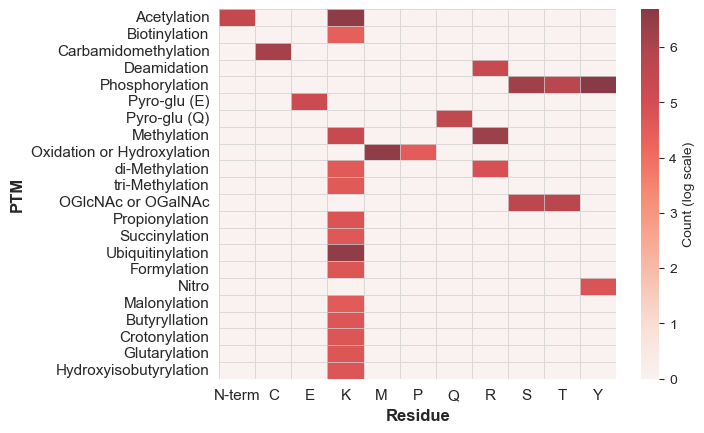

In [46]:
#sns.set(style="ticks")
sns.set_style("darkgrid")
heatmap = sns.heatmap(data.T, cmap="Reds", linewidths=0.5, alpha = 0.75,
                      linecolor="lightgray",
                      cbar_kws={'label': 'Count (log scale)'})#, figsize=(9, 9))


heatmap.set_xticklabels(unique_aas)
heatmap.set_yticklabels(updated_unique_mods_names)
#heatmap.set_yticklabels(["ID:"+str(x) for x in unique_mods])
#heatmap.set_yticklabels(unique_mods_names)

plt.yticks(rotation=0,  fontsize = 11)#, fontweight = "bold")
plt.xticks(rotation=0,  fontsize = 11)#, fontweight = "bold")
plt.xlabel("Residue", fontsize = 12, fontweight = "bold")
plt.ylabel("PTM", fontsize = 12, fontweight = "bold")


#cbar = plt.colorbar(heatmap)
#cbar.ax.set_ylabel('Count (log scale)', rotation=0)


plt.savefig("heatmap.pdf", format="pdf", bbox_inches = "tight")
plt.show()

In [15]:
def get_aas_mods_frequencies(counter):

    frequency_mods = {}
    frequency_aas = {}

    for k, v in counter.items():
        aa = k[0]
        mod = k[1:]
        frequency_mods[mod] = frequency_mods.get(mod, 0) + v
        frequency_aas[aa] = frequency_aas.get(aa, 0) + v
        
    return frequency_aas, frequency_mods

f_aas, f_mods = get_aas_mods_frequencies(counter)

In [16]:
f_aas, f_mods

({'M': 3333261,
  'C': 1398912,
  'K': 7464805,
  'S': 2146560,
  'R': 2284961,
  'T': 1015720,
  '-': 297117,
  'Q': 358872,
  'P': 31494,
  'Y': 4881314,
  'E': 172812},
 {'35': 3364755,
  '4': 1398912,
  '121': 3334503,
  '21': 7064871,
  '36': 111968,
  '43': 920195,
  '1363': 48480,
  '1': 3717145,
  '7': 228274,
  '28': 358872,
  '3': 25703,
  '1849': 48390,
  '122': 50308,
  '747': 34981,
  '27': 172812,
  '34': 2205259,
  '354': 58528,
  '37': 38082,
  '1848': 52873,
  '64': 46910,
  '1289': 47538,
  '58': 56469})

In [39]:
from matplotlib import colors

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap
cmap = plt.get_cmap('Reds_r')
new_cmap = truncate_colormap(cmap, 0.2, 0.8)

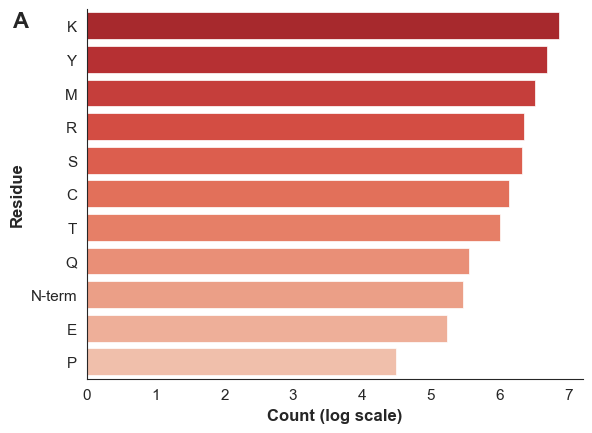

In [48]:
labels = list(f_aas.keys())
bar_sizes = list(f_aas.values())

colors = [new_cmap(i / len(bar_sizes)) for i in range(len(bar_sizes))]

# Create a DataFrame from the lists
df = pd.DataFrame({'Amino Acid': labels, 'Count': bar_sizes}).sort_values(by = "Count", ascending = False)

df.Count = np.log10(df.Count)
df.loc[df["Amino Acid"] == "-", "Amino Acid"] = "N-term"
# Create horizontal bar plot using Seaborn
#sns.barplot(x='Count', y='Amino Acid', data=df, palette="RdBu_r")
sns.set_style("white")
#sns.barplot(x='Count', y='Amino Acid', data=df, palette="Reds_r", alpha = 1, linewidth = 0.5)
ax = sns.barplot(x='Count', y='Amino Acid', data=df, palette = colors, alpha = 1, linewidth = 0.5)
plt.xlabel("Count (log scale)", fontsize = 12, fontweight = "bold")
plt.ylabel("Residue", fontsize = 12, fontweight = "bold")

plt.text(-0.15, 0.95, "A", transform=plt.gca().transAxes, fontsize=16, fontweight='bold')

plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)
plt.grid(visible = False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)

plt.savefig("aa_freq.pdf", format="pdf", bbox_inches="tight")
plt.show()



In [ ]:
labels = list(f_aas.keys())
bar_sizes = list(f_aas.values())



# Create a DataFrame from the lists
df = pd.DataFrame({'Amino Acid': labels, 'Count': bar_sizes}).sort_values(by = "Count", ascending = False)

df.Count = np.log10(df.Count)
df.loc[df["Amino Acid"] == "-", "Amino Acid"] = "N-term"
# Create horizontal bar plot using Seaborn
#sns.barplot(x='Count', y='Amino Acid', data=df, palette="RdBu_r")
sns.set_style("white")
#sns.barplot(x='Count', y='Amino Acid', data=df, palette="Reds_r", alpha = 1, linewidth = 0.5)
ax = sns.barplot(x='Count', y='Amino Acid', data=df, palette = colors, alpha = 1, linewidth = 0.5)
plt.xlabel("Count (log scale)", fontsize = 12, fontweight = "bold")
plt.ylabel("Residue", fontsize = 12, fontweight = "bold")

plt.text(-0.15, 0.95, "A", transform=plt.gca().transAxes, fontsize=16, fontweight='bold')

plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)
plt.grid(visible = False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)

plt.savefig("aa_freq.pdf", format="pdf", bbox_inches="tight")
plt.show()



Found in unimod:  21
Modification(average_mass=79.9799, approved=True, id=21, full_name='Phosphorylation', ex_code_name='Phospho', composition=Composition({'H': 1, 'O': 3, 'P': 1}), monoisotopic_mass=79.966331, code_name='Phospho', username_of_poster='unimod')
--------------------------------------------------
Found in unimod:  1
Modification(approved=True, username_of_poster='unimod', ex_code_name='Acetyl', code_name='Acetyl', full_name='Acetylation', composition=Composition({'H': 2, 'C': 2, 'O': 1}), monoisotopic_mass=42.010565, id=1, average_mass=42.0367)
--------------------------------------------------
Found in unimod:  35
Modification(monoisotopic_mass=15.994915, average_mass=15.9994, code_name='Hydroxylation', full_name='Oxidation or Hydroxylation', composition=Composition({'O': 1}), id=35, approved=False, username_of_poster='unimod', ex_code_name='Oxidation')
--------------------------------------------------
Found in unimod:  121
Modification(approved=True, full_name='ubiquit

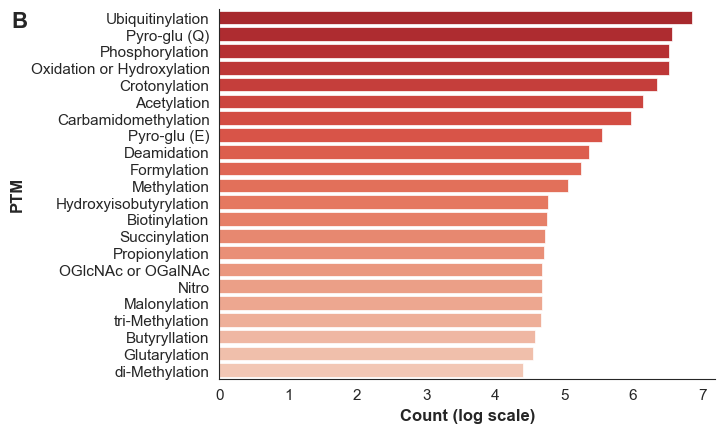

In [53]:
labels = list(f_mods.keys())
bar_sizes = list(f_mods.values())

colors = [new_cmap(i / len(bar_sizes)) for i in range(len(bar_sizes))]

# Create a DataFrame from the lists
df = pd.DataFrame({'PTM': labels, 'Count': bar_sizes}).sort_values(by = "Count", ascending = False)

df.Count = np.log10(df.Count)

#df.PTM = pd.Series(lookup_mod_names(df.PTM.values))
df.PTM = pd.Series(lookup_mod_names(df.PTM.values)).map(lookup_dict_updated_names)


# Create horizontal bar plot using Seaborn

sns.set_style("white")
ax = sns.barplot(x='Count', y='PTM', data=df, palette=colors, alpha = 1, linewidth = 0.5)
plt.xlabel("Count (log scale)", fontsize = 12, fontweight = "bold")
plt.ylabel("PTM", fontsize = 12, fontweight = "bold")

plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.text(-0.42, 0.95, "B", transform=plt.gca().transAxes, fontsize=16, fontweight='bold')

plt.savefig("ptm_freq.pdf", format="pdf", bbox_inches="tight")

plt.show()


In [7]:
np.log10(30102947)

7.478609013972195